아래 강의 노트는 [Python for data Analysis 책](https://github.com/wesm/pydata-book)4장을 기반으로 번역 및 편집하여 페이지 구성함
<br><img src ="https://image.yes24.com/goods/73268296/800x0" width=5%>

<font color ="blue"> **무단 배포를 금지 합니다.** </font>


# pandas 시작하기

- **공식홈페이지 :**  https://pandas.pydata.org/
- **문서** https://pandas.pydata.org/

``` scipy``` , ``` numpy```, ``` statsmodels```, ``` scikit-learn```와 ``` matplotlib```와 함께 사용 하는 경우가 흔함

* ```numpy```  :  단일 산술 배열 데이터를 다루는데 특화
* ```pandas``` :  표 형식의 데이터나 다양한 형태의 데이터를 다루는데 초점

판다스(Pandas)는 Python에서 DB처럼 테이블 형식의 데이터를 쉽게 처리할 수 있는 라이브러리 입니다. 데이터가 테이블 형식(DB Table, csv 등)으로 이루어진 경우가 많아 데이터 분석 시 자주 사용하게 될 Python 패키지입니다.

In [8]:
import pandas as pd
# // 판다스는 엑셀같은 숫자와 문자열, 불린형, 여러가지 데이터들 한꺼번에 
# // 넘파이 자체보다 판다스 데이터로 하는게 좀 더 많음
# // 시각화, 분석화는 판다스 형태로 쓰여짐

```series```와 ```Dataframe```은 로컬 네임스페이스로 임포트 하는 것이 편하기 때문에 다음과 같이 사용

In [9]:
from pandas import Series, DataFrame

## pandas 자료구조
### Series
```series``` 는 객체를 담을 수 있는 1차원 배열같은 자료구조
**색인** 이라고하는 배열의 데이터와 연관된 이름을 갖음
<img src="https://laboputer.github.io/assets/img/ml/python/pandas/1.JPG" width= 50%>

###### 출처 :https://laboputer.github.io/assets/img/ml/python/pandas/1.JPG

In [10]:
import numpy as np
import pandas as pd
obj = pd.Series([4, 7, -5, 3])
print(obj)
nparr = np.array([[4, 7, -5, 3]])
nparr

0    4
1    7
2   -5
3    3
dtype: int64


array([[ 4,  7, -5,  3]])

Series의 배열과 색인 객체는 각각 ```value```, ```index``` 속성을 통해 얻기 가능

In [11]:
print(obj.values)
print(obj.index)  # like range(4)

[ 4  7 -5  3]
RangeIndex(start=0, stop=4, step=1)


색인을 지정하여 ```Series```객체를 생성할 때

In [12]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c']) // 인덱스에 값을 넣어줘서 0123이 아닌 dbac가 나옴
print(obj2)                                                 //index=['d', 'b', 'c', 'c'] 
print(obj2.index)                                           // 넘파이는 인덱스 중복 불가, 판다스는 상관 없음

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (1461572472.py, line 1)

In [13]:
obj2['a']
obj2['d'] = 6             // 값을 바꿔줌
OB=obj2[['c', 'a', 'd']]  // 처음에 c인덱스를 갖고오고 그다음 a, d 
OB                        // d값을 바꿔준게 출력될것.
obj2

SyntaxError: invalid syntax (2668395027.py, line 2)

```Series```는 고정길이의 정렬된 사전형
색인값에 데이터 값을 매핑 하고 있기때문에, 파이썬의 사전형과 비슷

In [14]:
import numpy as np
print(obj2[obj2 > 0])
print(obj2 * 2)
print(np.exp(obj2))

NameError: name 'obj2' is not defined

In [15]:
print('b' in obj2)
print('e' in obj2)

NameError: name 'obj2' is not defined

파이썬의 ```Dictionary``` 타입을 ```Series```로 변형가능

In [16]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000} 
obj3 = pd.Series(sdata)   // key : value 할당이 되어지는 사전형 데이터를 series로 바꿔준다.
obj3

SyntaxError: invalid syntax (1370561172.py, line 2)

사전 객체만으로 ```Series```객체를 생성하면 생성된 ```Series```객체의 색인에는 사전의 키 값의 순서대로 입력

색인을 지정하고 싶다면 원하는 순서대로 색인을 직접 넘기기 가능
* 아래의 예는 ```sdata```에 있는 값중 3개만 확인 가능
* California는 값을 찾을수 없기 때문에 ```NaN``` 표시
* utah는 색인에 없기 때문에 실행결과에서 빠짐

In [17]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)              // 넘파이랑 가장 큰 차이점은 시리즈 데이터 타입은 인데그를 지정할수가있고
obj4                                               // 숫자가 아닌 문자열이여도 되고

SyntaxError: invalid syntax (3060669289.py, line 2)

```isnull```,```notnull```누락된 데이터를 찾을 때 사용

In [18]:
pd.isnull(obj4)
pd.notnull(obj4)

NameError: name 'obj4' is not defined

In [19]:
obj4.isnull()

NameError: name 'obj4' is not defined

```Series```에서 산술 기능은 색인과 라벨로 자동 정렬
데이터 베이스 에서 join연산과 비슷하게 작동

In [20]:
print(obj3)
print(obj4)   // 합집합, 없는애는 없는애로, 
obj4 + obj3

SyntaxError: invalid syntax (3607975602.py, line 2)

```name``` 속성을 이용하여 시리즈 데이터에 이름
```index.name``` 속성으로 시리즈의 인덱스에도 이름

In [21]:
obj4.name = 'population'            // 값에대한 이름을 population으로 지정
obj4.index.name = 'state'           // 인덱스에 대한 이름을 state로 지정
obj4

SyntaxError: invalid syntax (3164707322.py, line 1)

In [22]:
obj
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### DataFrame

특징
* ```DataFrame```은 스프레드 시트 형식의 자료구조이고 여러개의 컬럼이 있는데 각 컬럼은 서로 다른 종류의 값(숫자, 문자열, 불리언)을 담을 수 있음
* ```DataFrame```은 로우와 컬럼에 대한 색인을 갖고 있는데 ```Series```객체를 담고 있는 파이썬의 사전으로 생각 가능
* ```DataFrame```은 물리적으로는 2차원 이지미만 계층적 색인을 이용하여 고차원 데이터 표현 가능

가장 흔하게 사용되는 표현 방법은 아래와 같이 리스트에 담긴 사전이용하거나 numpy배열이용
<img src="https://laboputer.github.io/assets/img/ml/python/pandas/2.JPG" width=50%>

##### 출처 :https://laboputer.github.io/assets/img/ml/python/pandas/2.JPG

In [23]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], # 이것이 하나의 시리즈라고 생각 
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

In [24]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


```head```메서드를 이용하여 처음 5개의 행만 출력 가능

In [25]:
frame.tail()

,state,year,pop
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


```columns```를 지정하면 원하는 순서를 가진 ```DataFrame```객체 생성

In [26]:
pd.DataFrame(data, columns=['year', 'state', 'pop']) # 컬럼 값을 바꾼 예시

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


```Series```와 마찬가지로 사전에 없는 값을 넘기면 결측치로 저장

In [27]:
import pandas as pd
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])                    # 인덱스를 숫자가 아닌 문자열로 바꾸는 것
print(frame2)
frame2.index                                                    # 인덱스를 갖고 오는 것

       year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN
six    2003  Nevada  3.2  NaN


Index(['one', 'two', 'three', 'four', 'five', 'six'], dtype='object')

```DataFrame```은 ```Series```처럼 사전 형식의 표기법이나 속성 형식으로 표기 가능

In [28]:
frame2['state'] # 사전 형식
frame2.year     #속성 형식

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

행의 위치나 ```loc```속성을 이용하여 이름을 통해 접근 가능

In [29]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [30]:
import numpy as np
frame2['debt'] = 16.5
print(frame2)
frame2['debt'] = np.arange(6.)
print("\n\n",frame2)

       year   state  pop  debt
one    2000    Ohio  1.5  16.5
two    2001    Ohio  1.7  16.5
three  2002    Ohio  3.6  16.5
four   2001  Nevada  2.4  16.5
five   2002  Nevada  2.9  16.5
six    2003  Nevada  3.2  16.5


        year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0
six    2003  Nevada  3.2   5.0


In [31]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


```frame2.state```이 ```'Ohio'```인지 아닌지에 대한 불리언 값을 담고 있는 ```'eastern'```이라는 새로운 컬럼 값을 생성

In [32]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


```del```예약어를 이용하여 컬럼 삭제 가능

In [33]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

중첩된 사전을 ```DataFrame```에 넘기면 바깥에 있는 사전의 키는 컬럼이 되고 안에 있는 키는 로우가 된다.

In [34]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [35]:
pop = {'Nevada': [2.4, 2.9],
       'Ohio': [1.5, 1.7, 3.6]}
frame3 = pd.DataFrame([pop])              #데이터 개수가 달라서 오류가 남

In [36]:
frame3 = pd.DataFrame([pop])
frame3

,Nevada,Ohio
0,"[2.4, 2.9]","[1.5, 1.7, 3.6]"


```Numpy```배열과 유사한 문법으로 데이터 전치 가능

In [37]:
frame3.T

,0
Nevada,"[2.4, 2.9]"
Ohio,"[1.5, 1.7, 3.6]"


In [38]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

ValueError: Length of values (2) does not match length of index (3)

In [ ]:
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}
pd.DataFrame(pdata)

In [ ]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

Series와 유사하게 values속성은 DataFrame에 저장된 데이터를 2차원 배열로 반환

In [39]:
frame3.values

array([[list([2.4, 2.9]), list([1.5, 1.7, 3.6])]], dtype=object)

In [40]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

### 색인 객체 (Index Objects)

색인 객체는 표형식의 데이터에서 각 행과 열에 대한 이름과 다른 메타데이터를 저장하는 객체
```Series``` 나 ```DataFrame```객체를 생성할 때 사용되는 배열이나 다른 순차적인 이름은 내부적으로 색인으로 변환

In [41]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
idx = obj.index
idx
idx[1]='f'

TypeError: Index does not support mutable operations

색인 객체는 변경 불가능
```python
# python 
index[1] = 'd'  # TypeError
```

In [ ]:
labels = pd.Index(np.arange(3))
print(labels)
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
print("\n\n",obj2)
print("\n\n",obj2.index is labels)

In [42]:
print(frame3)
print("\n\n",frame3.columns)
print("\n\n",'Ohio' in frame3.columns)
print("\n\n", 2003 in frame3.index)

       Nevada             Ohio
0  [2.4, 2.9]  [1.5, 1.7, 3.6]


 Index(['Nevada', 'Ohio'], dtype='object')


 True


 False


파이썬의 집합과는 달리 pandas의 인덱스는 중복 값을 허용.

In [43]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
print(dup_labels)
dl = pd.Series([1,2,3,4],index= dup_labels)
print("\n\n",dl)
print("\n\n",dl['foo'])
print("\n\n",dl.foo)



Index(['foo', 'foo', 'bar', 'bar'], dtype='object')


 foo    1
foo    2
bar    3
bar    4
dtype: int64


 foo    1
foo    2
dtype: int64


 foo    1
foo    2
dtype: int64


## 핵심 기능

### 재색인 기능

새로운 색인데 맞도록 객체를 새로 생성  
```Series```객체에 대해서 ```reindex```를 호출하면 데이터를 새로운 색인데 맞게 재배열하고 존재하지 않는 색이 있다면 ```NaN```을 추가

In [44]:
import pandas as pd
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [45]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e']) # 인덱스 재배열, 데이터를 합쳐야할 때 자주 쓰임
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

시계열 같은 순자적인 데이터 재색인할 때 값을 보간 하거나 채워 넣어야 할 경우, ```method``` 옵션을 이용해 이를 해결 가능 하며 ```ffill```같은 메서드를 이용하여 누락된 값을 직전의 값으로 채워 넣을 수 있다.   

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html

In [46]:
import pandas as pd
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3
obj3.reindex(range(6), method='bfill') # 1,3,5가 없는데, method = pad, nearest, pad로 설정 

obj4 = obj3.reindex(range(6), method='bfill')
obj4        # 과제 타겟 네임

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object

In [47]:
obj3.reindex(range(6))

0      blue
1       NaN
2    purple
3       NaN
4    yellow
5       NaN
dtype: object

```reindex```는 색인과 컬럼  또는 둘다 변경 가능 

In [48]:
import pandas as pd
import numpy as np
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])

frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


컬럼은 ```reindex``` 예약어를 사용해서 재색인

In [49]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [50]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [51]:
frame.loc[['a','c']]

,Ohio,Texas,California
a,0,1,2
c,3,4,5


### 하나의 행이나 열 삭제 하기

```drop``` 메서들를 사용하여 선택한 값들이 삭제된 새로운 객체 얻기 가능   


**주의:** drop함수는 특정 행 또는 열을 drop하고난 DataFrame을 반환한다.
즉, 반환을 받지 않으면 기존의 DataFrame은 그대로이다.
아니면, inplace=True라는 인자를 추가하여, 반환을 받지 않고서도 기존의 DataFrame이 변경되도록 한다.


In [52]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj
new_obj = obj.drop('c')
new_obj
obj
obj.drop(['d', 'c'],axis=0)
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [53]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [54]:
data.drop(['Colorado', 'Ohio']) # 데이터 지우기


,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [55]:
data = data.drop('two', axis=1)
data.drop(['two', 'four'], axis='columns')

KeyError: "['two'] not found in axis"

In [ ]:
obj.drop('c', inplace=True)
obj

### 색인하기, 선택하기, 거르기

```Numpy``` 의 색인과 ```pandas```색인은 유사하게 동작하지만 정수가 아니어도 된다

In [56]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
display(obj)
obj['b']
obj[1]
obj[2:4]
obj[['b', 'a', 'd']]
obj[[1, 3]]
obj[obj < 2]

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

a    0.0
b    1.0
dtype: float64

라벨 이름으로 슬라이싱 하면 시작점과 끝점을 **"포함"**한다는 것이 일반 파이썬의 슬라이싱과 다른 점

In [57]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

슬라이싱 문법으로 선택된 영역에 값을 대입하는 것은 생각하는 대로 동작 한다.

In [58]:
obj['b':'c'] = 5
obj
obj[1]=10
obj

a     0.0
b    10.0
c     5.0
d     3.0
dtype: float64

색인으로 DataFrame 에서 하나 이상의 컬럼 값을 가져 올 수 있다.

In [59]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data
data['two']
data[['three', 'one']]
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


슬라이싱으로 로우를 선택하거나, 불리언 배열로 로우 선택 가능   
[ ]연산자에 단일 값을 넘기거나 리스트를 넘겨서 여러 컬럼 값을 선택 할 수 있음

In [60]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [129]:
data[:2] # 0하고 1만 가져옴
data[data['three'] > 5]
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


스칼라 값으로 비교시에는 불리언 DataFrame을 사용해서 값을 선택

In [130]:
data < 5
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


#### loc and iloc으로 선택하기

In [134]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [135]:
data.loc['Colorado', ['two', 'three']] # color 가로, two 세로

two      5
three    6
Name: Colorado, dtype: int64

In [136]:
data.iloc[2, [3, 0, 1]]


four    11
one      8
two      9
Name: Utah, dtype: int64

In [66]:
data.iloc[2] # 유타의 모든 값

one       8
two       9
three    10
four     11
Name: Utah, dtype: int64

In [137]:
data.iloc[[1, 2], [3, 0, 1]] # 행순서, 열순서 재배열

,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [138]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [139]:
data.loc[:'Utah', 'two'] # 넘파이는 뒤에있는 숫자 포함 x  유타를 포함하고 있어서 값이 loc와 iloc차이 확인


Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int64

In [140]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


### 정수 색인

아래의 예에서 라벨 색인이 0,1,2를 포함하는 경우 사용자가 라벨 색인으로 선택하려는 것인지 정수 색인으로 선택하려는 것인지 추측하기 쉽지 않음

In [144]:
ser = pd.Series(np.arange(3.),index=[1,2,3]) # index는 123, range 는 012 
ser[2]

1.0

In [145]:
ser = pd.Series(np.arange(3.))

In [146]:
ser[2]

2.0

반면  아래와 같이 정수 색인이 아닌 경우 이러한 모호함은 사라짐

In [147]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

2.0

일관성 유지를 위하여 정수값을 담고 있는 축 색인이 있다면 우선적으로 라벨을 먼저 찾음

조금 더 세밀하게 사용하고 싶다면 라벨에 대해서는 ```loc```를 사용하고 정수 색인에 대해서는 ```iloc```을 사용

In [148]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [149]:
ser[:1]
ser.loc[:1]
#ser.iloc[:1]

0    0.0
1    1.0
dtype: float64

In [150]:
ser.iloc[:1]

0    0.0
dtype: float64

### 산술 연산과 데이터 정렬

pandas에서 가장 중요한 기능 중 하나는 다른 색인을 가지고 있는 객체 간의 산술 연산
객체를 더할때 짝이 맞지 않는 색인이 있다면 결과에 두색인이 통합  
서로 겹치는 색인이 없는 경우 데이터는 NA 값

In [152]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])
s1




a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [153]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [155]:
s1 + s2 
# db에서 조인연산처럼 없으면 nan으로 찍힘

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

```Dataframe```의 경우 정렬은 로우와 컬럼 모두 적용

In [156]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1


,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [82]:
df2 
# 1에는 없는 2개

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


c 와 e 컬럼이 양쪽 DataFrame객체에 존재하지 않으므로 결과에서 모두 없는 값으로 나타남   
로우 역시 마찬가지로 양쪽에 다 존재하지 않는 라벨에 대해서는 없는 값으로 나타남


In [157]:
df1 + df2

#없었던 000으로 되어지고 bcd인데 bde이므로 순서도 맞춰서 nan으로 찍힘 없는것은, 
#

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [158]:
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})
df1
df2
df1 - df2

# frame이건 series건 행 열 이름이 같아야한다.

,A,B
0,NaN,NaN
1,NaN,NaN


#### 산술 연산 메서드를 채워 넣을 값 지정하기

In [85]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [86]:
df2.loc[1, 'b'] = np.nan
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


겹쳐지지 않는 부분은 NA

In [87]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


df1에 add 메서드를 사용하고 df2와 fill_value 값을 인자로 전달

In [159]:
d=df1.add(df2, fill_value=0)
d

,A,B
0,1.0,3.0
1,2.0,4.0


r로 시작하는 메서더는 계산 인자를 뒤집어 계산

In [160]:
1 / df1


,A
0,1.0
1,0.5


In [161]:
df1.rdiv(1)

,A
0,1.0
1,0.5


In [162]:
df1.reindex(columns=df2.columns, fill_value=0)

,B
0,0
1,0


#### DataFrame 과 Series 간의 연산

브로드 캐스팅을 이용하여 빼기

In [163]:
arr = np.arange(12.).reshape((3, 4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [164]:
arr[0]

array([0., 1., 2., 3.])

In [165]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [166]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [167]:
series = frame.iloc[0]
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [168]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


기본적으로 DataFrame과 Series간의 산술 연산은 Series의 색인을 DataFrame의 컬럼에 맞추고 아래 로우로 전파

In [169]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [170]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [171]:
series3 = frame['d']
series3


Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

```axis='index'``` 나```axis=0``` 은 DataFrame의 로우를 따라 연산을 수행

In [172]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [173]:
series3


Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [174]:
frame.sub(series3, axis='index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


### 함수 적용과 매핑

In [175]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame


,b,d,e
Utah,1.755454,1.493599,-1.467244
Ohio,0.780789,0.781978,0.542736
Texas,1.006344,0.761374,0.166338
Oregon,0.436612,-0.736644,0.573528


In [105]:
np.abs(frame)

,b,d,e
Utah,0.252534,0.610540,0.542920
Ohio,2.070220,0.438641,0.458078
Texas,0.024418,1.688204,0.866407
Oregon,1.500943,1.353169,2.337553


함수 f는 Sereies의 최대값과 최소값 차이를 계산 하는 함수

In [106]:
f = lambda x: x.max() - x.min()
frame.apply(f)

b    3.571163
d    1.249564
e    2.880472
dtype: float64

함수의 인자로 ```axis='columns'```를 넘기면 각 행에 대해 한번씩 수행

In [107]:
frame.apply(f, axis='columns')

Utah      1.153460
Ohio      2.528297
Texas     1.663786
Oregon    3.838496
dtype: float64

In [108]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

,b,d,e
min,-1.500943,0.438641,-0.542920
max,2.070220,1.688204,2.337553


frame객체에서 실수값을 문자열 포맷으로 변환하고 싶다면 ```applymap```을 이용해서 사용

In [109]:
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,0.25,0.61,-0.54
Ohio,2.07,0.44,-0.46
Texas,0.02,1.69,0.87
Oregon,-1.50,1.35,2.34


In [110]:
frame['e'].map(format)

Utah      -0.54
Ohio      -0.46
Texas      0.87
Oregon     2.34
Name: e, dtype: object

### 정렬과 순위

In [111]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [112]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame.sort_index()
#frame.sort_index(axis=1)

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [113]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [114]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [115]:
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [116]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [117]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [118]:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


In [119]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [120]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [121]:
# Assign tie values the maximum rank in the group
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [122]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                      'c': [-2, 5, 8, -2.5]})
frame
frame.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


### Axis Indexes with Duplicate Labels

In [123]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [124]:
obj.index.is_unique

False

In [125]:
obj['a']
obj['c']

4

In [126]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df
df.loc['b']

,0,1,2
b,1.045762,-0.099889,-0.085191
b,-0.533917,-0.608055,-0.602372


## 기술 통계 계산과 요약

pandas는 일반적인 수학 메서드와 통계 메서드를 가지고 있다.  행이나 열에서의 단일 값(합 또는 평균)을 구하는 축소 또는 요약 통계가 가능

In [127]:
import pandas as pd
import numpy as np

In [128]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [125]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [126]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [127]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

```idxmax()``` 나```idxmin()```같은 메서드는 최솟값 혹은 최대 값을 가지고 있는 색인과 같은 간접 통계 반환

In [128]:
df.idxmax()

one    b
two    d
dtype: object

In [129]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [130]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [131]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

![](/Users/Jaehee/Downloads/pandas3.png)

### 상관관계와 공분산

! conda install pandas-datareader
! pip3 install pandas-datareader

In [137]:
import pandas as pd
price = pd.read_pickle('./yahoo_price.pkl')
volume = pd.read_pickle('./yahoo_volume.pkl')

In [140]:
import pandas_datareader.data as web
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
                      for ticker, data in all_data.items()})

주식의 퍼센트 변화율 계산후 맨 마지막 5개를 보여준다

In [141]:
returns = price.pct_change()
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2021-09-30,-0.009312,-0.001796,-0.007324,-0.009333
2021-10-01,0.008127,0.031599,0.025468,0.023990
2021-10-04,-0.024606,0.005512,-0.020720,-0.019767
2021-10-05,0.014158,-0.006662,0.019957,0.018032
2021-10-06,-0.006094,-0.012504,0.001974,0.003147


```corr``` 메서드는 NA가 아니며 정렬된 색인에서 연속하는 두 Series에 대해 상관관계를 계산하고 ```cov```메서드는 공분산을 계산한다

In [142]:
returns['MSFT'].corr(returns['IBM'])
returns['MSFT'].cov(returns['IBM'])

0.0001450203853326082

In [143]:
import seaborn as sns
returns.corr()


,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.441155,0.738137,0.665192
IBM,0.441155,1.000000,0.513111,0.481137
MSFT,0.738137,0.513111,1.000000,0.776016
GOOG,0.665192,0.481137,0.776016,1.000000


<AxesSubplot:>

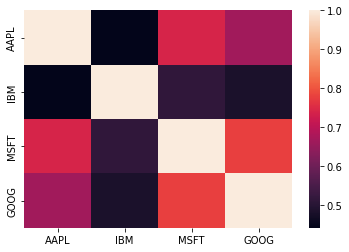

In [144]:
sns.heatmap(returns.corr())

In [145]:
returns.corrwith(returns.IBM)

AAPL    0.441155
IBM     1.000000
MSFT    0.513111
GOOG    0.481137
dtype: float64

In [146]:
returns.corrwith(volume)

AAPL   -0.075843
IBM    -0.102388
MSFT   -0.059381
GOOG   -0.124320
dtype: float64

### 유일값, 값 세기, 멤버십

In [147]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [148]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [149]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [150]:
pd.value_counts(obj.values, sort=False)

c    3
d    1
b    2
a    3
dtype: int64

 ```isin``` 메서드는 어떤 값이 Series에 존재 하는지 나타내는 불리언 벡터를 반환  
 Series나 DataFrame의 컬럼에서 값을 골라내고 싶을 때 유용하게 사용
 

In [151]:
obj
mask = obj.isin(['b', 'c'])
mask
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [152]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
unique_vals = pd.Series(['c', 'b', 'a'])
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2])

In [153]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [154]:
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0
